[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/thekingslayer/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/thekingslayer/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/Users/thekingslayer/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
/Users/thekingslayer/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 21966 (\N{CJK UNIFIED IDEOGRAPH-55CE}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/thekingslayer/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 27794 (\N{CJK UNIFIED IDEOGRAPH-6C92}) missing from current font.

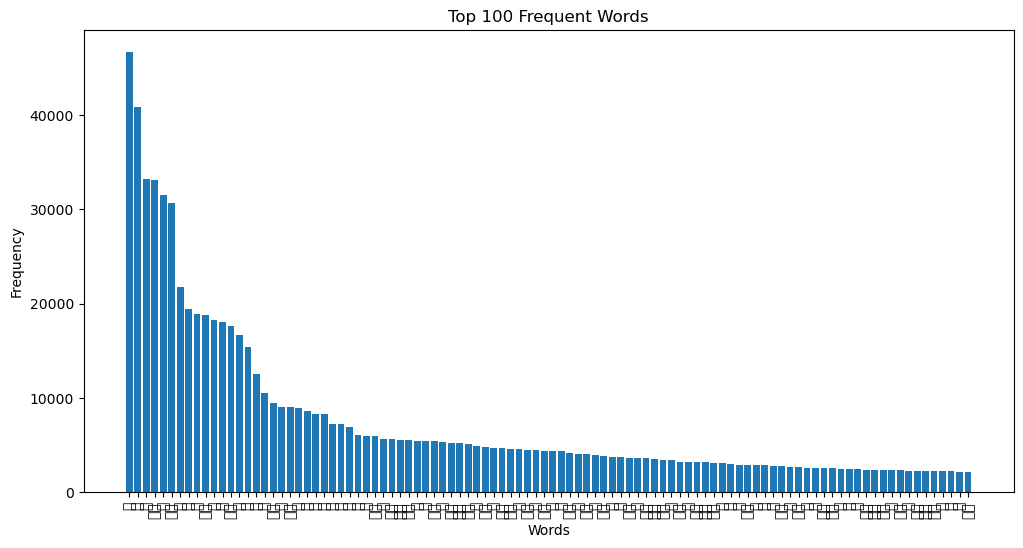

/Users/thekingslayer/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20843 (\N{CJK UNIFIED IDEOGRAPH-516B}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/thekingslayer/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 21350 (\N{CJK UNIFIED IDEOGRAPH-5366}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/thekingslayer/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 20160 (\N{CJK UNIFIED IDEOGRAPH-4EC0}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/thekingslayer/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 40636 (\N{CJK UNIFIED IDEOGRAPH-9EBC}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/thekingslayer/opt/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyp

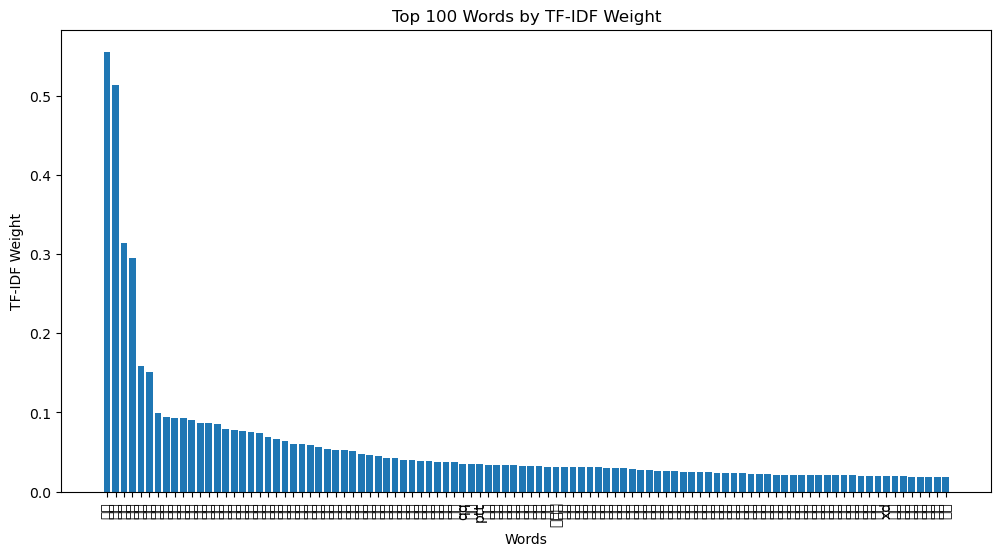

In [19]:
import nltk
import jieba
import glob
import os
 
nltk.download('stopwords')
nltk.download('punkt')
 
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt

all_text = ''
for file_path in glob.glob('hw1-dataset.txt'):
    with open(file_path, 'r', encoding='utf-8') as file:
        all_text += file.read()
words = list(jieba.cut(all_text))

stop_words = set(stopwords.words('chinese'))
words = [word for word in words if word not in stop_words and word.isalpha()]
 
fdist = FreqDist(words)
 
lemmatizer = WordNetLemmatizer()
words = [lemmatizer.lemmatize(word) for word in words]
 
tfidf_vectorizer = TfidfVectorizer(max_features=100)
tfidf = tfidf_vectorizer.fit_transform([' '.join(words)])
 
fdist_top = fdist.most_common(100)
fdist_words = [word[0] for word in fdist_top]
fdist_freq = [word[1] for word in fdist_top]
 
tfidf_weights = tfidf.toarray()[0]
tfidf_top_idx = tfidf_weights.argsort()[::-1][:100]
tfidf_top_words = [tfidf_vectorizer.get_feature_names()[i] for i in tfidf_top_idx]
tfidf_top_weights = [tfidf_weights[i] for i in tfidf_top_idx]
 
plt.figure(figsize=(12, 6))
plt.bar(fdist_words, fdist_freq)
plt.xticks(rotation=90)
plt.title('Top 100 Frequent Words')
plt.xlabel('Words')
plt.ylabel('Frequency')
plt.show()
 
plt.figure(figsize=(12, 6))
plt.bar(tfidf_top_words, tfidf_top_weights)
plt.xticks(rotation=90)
plt.title('Top 100 Words by TF-IDF Weight')
plt.xlabel('Words')
plt.ylabel('TF-IDF Weight')
plt.show()


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/thekingslayer/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     /Users/thekingslayer/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
/Users/thekingslayer/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


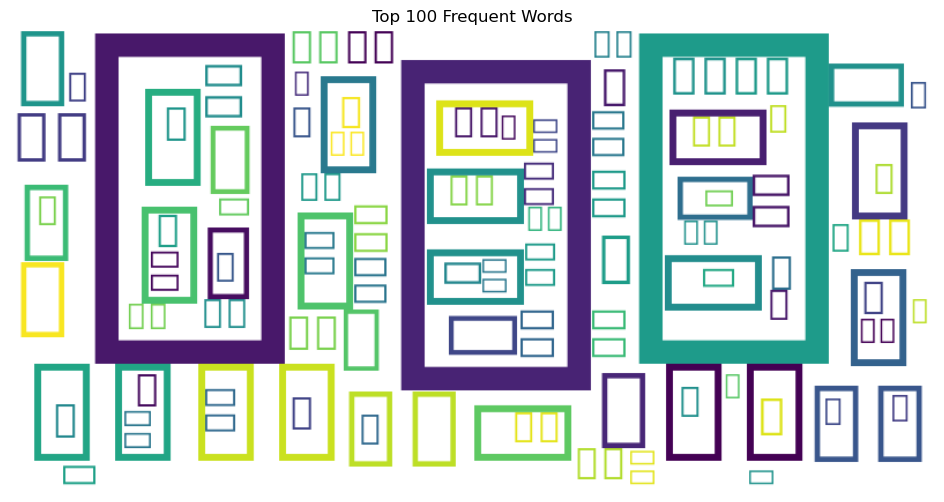

In [24]:
import nltk
import jieba
import glob
import os
from nltk.probability import FreqDist
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud

nltk.download('stopwords')
nltk.download('punkt')

all_text = ''
for file_path in glob.glob('hw1-dataset.txt'):
    with open(file_path, 'r', encoding='utf-8') as file:
        all_text += file.read()

words = list(jieba.cut(all_text))
stop_words = set(stopwords.words('chinese'))
words = [word for word in words if word not in stop_words and word.isalpha()]

fdist = FreqDist(words)

lemmatizer = WordNetLemmatizer()
words = [lemmatizer.lemmatize(word) for word in words]

tfidf_vectorizer = TfidfVectorizer(max_features=100)
tfidf = tfidf_vectorizer.fit_transform([' '.join(words)])

fdist_top = fdist.most_common(100)
fdist_words = [word[0] for word in fdist_top]
fdist_freq = [word[1] for word in fdist_top]

tfidf_weights = tfidf.toarray()[0]
tfidf_top_idx = tfidf_weights.argsort()[::-1][:100]
tfidf_top_words = [tfidf_vectorizer.get_feature_names()[i] for i in tfidf_top_idx]
tfidf_top_weights = [tfidf_weights[i] for i in tfidf_top_idx]

 fdist_wordcloud = WordCloud(background_color='white', width=800, height=400).generate(' '.join(fdist_words))
plt.figure(figsize=(12, 6))
plt.imshow(fdist_wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top 100 Frequent Words')
plt.show()

 